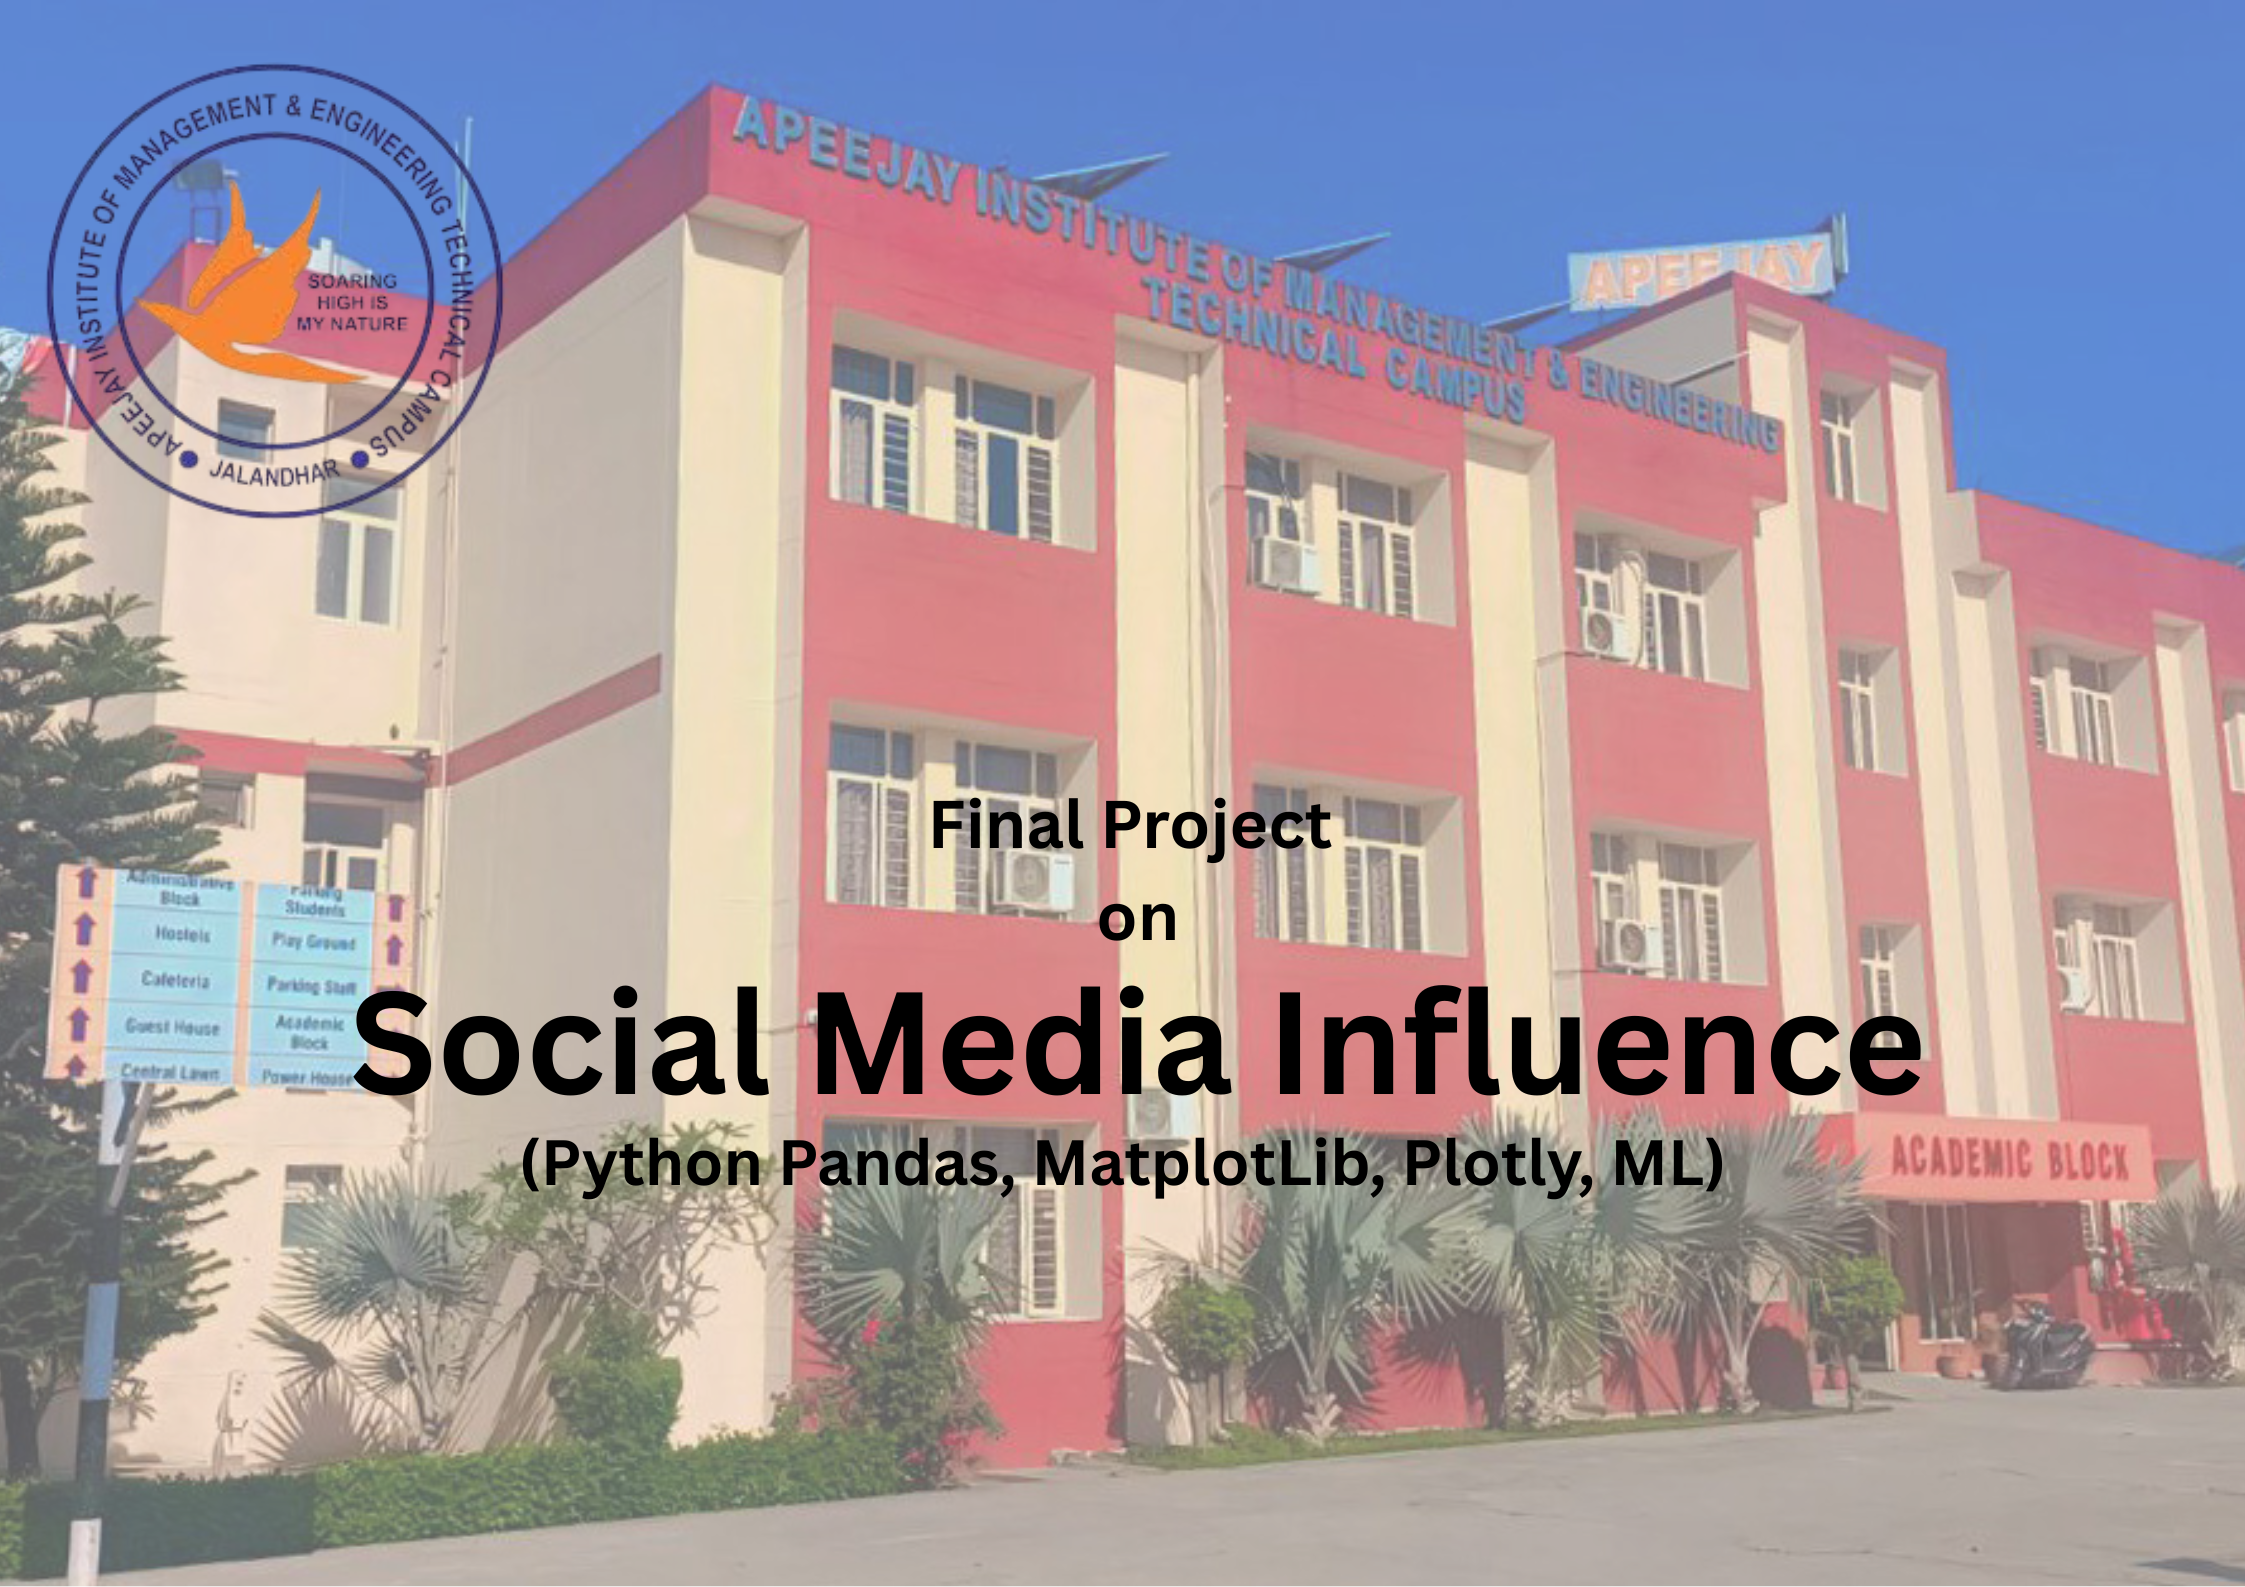

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

In [5]:
df=pd.read_csv("Social-media-dataset.csv",encoding='latin-1')
df.head()
#the dataset contains some characters that are not compatible with utf-8 encoding(which is default encoding of pd.read_csv) so latin-1 encoding is used that supports large variety of characters

Age  Gender Profession Most used Social Media  \
0  18-24 (Young Adults)  Female    Student              Instagram   
1  18-24 (Young Adults)  Female    Student              Instagram   
2  18-24 (Young Adults)  Female    Student              Instagram   
3        25-34 (Adults)    Male    Student              Instagram   
4     13-17 (Teenagers)  Female    Student                YouTube   

  Sleeping Hours (When didn't use social media) Sleeping Hours (Now)  \
0                                     6-7 hours            6-7 hours   
1                                     8-9 hours            6-7 hours   
2                                     8-9 hours            6-7 hours   
3                                     6-7 hours            6-7 hours   
4                                     8-9 hours            6-7 hours   

  Screen Time   Purpose Fulfilled  Quality of Sleep  Quality of Mood  \
0   3-4 hours       Entertainment                 7                4   
1   3-4 hours       Entertainment                 7                7   
2   5-6 hours       Entertainment                 6                2   
3   3-4 hours  Mindless Scrolling                 7                3   
4   5-6 hours  Mindless Scrolling                 7                5   

  Health Issues (if any) Impact of Social Media  \
0     Neck and back pain               Negative   
1             Eye strain               Positive   
2             Eye strain               Negative   
3             Eye strain               Negative   
4             Eye strain               Negative   

      Any other Leisure Activity      Time Spent on Whatsapp  \
0            Sleep or take a nap  Less than 30 minutes a day   
1  Finish pending Chores / Tasks  Less than 30 minutes a day   
2  Finish pending Chores / Tasks  30 minutes to 1 hour a day   
3            Sleep or take a nap  Less than 30 minutes a day   
4            Sleep or take a nap          2 to 3 hours a day   

   Time Spent on Instagram      Time Spent on Snapchat  \
0       2 to 3 hours a day  30 minutes to 1 hour a day   
1       1 to 2 hours a day  Less than 30 minutes a day   
2  More than 4 hours a day  Less than 30 minutes a day   
3  More than 4 hours a day          Don't use Snapchat   
4       1 to 2 hours a day  30 minutes to 1 hour a day   

       Time Spent on Facebook       Time Spent on Youtube  
0          Don't use Facebook  Less than 30 minutes a day  
1          Don't use Facebook  Less than 30 minutes a day  
2          Don't use Facebook          1 to 2 hours a day  
3  Less than 30 minutes a day  Less than 30 minutes a day  
4  Less than 30 minutes a day     More than 4 hours a day

# What purpose is fulfilled by using Social Media

In [6]:
impact_by_age = df.groupby(['Age', 'Purpose Fulfilled']).size().reset_index(name='Count')

fig = px.sunburst(
    impact_by_age,
    path=['Purpose Fulfilled','Age'],
    values='Count',
    color='Purpose Fulfilled',
     width=800,
    height=650
)

fig.show()

# Dashboard

In [7]:
!pip install dash
import dash
from dash import dcc
from dash import html

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 55.3 MB/s eta 0:00:00


In [8]:
from http.server import SimpleHTTPRequestHandler
impact_by_age = df.groupby(['Age', 'Health Issues (if any)']).size().reset_index(name='Count')

In [9]:
social_counts = df['Most used Social Media'].value_counts().reset_index(name='Count')
pie_fig = px.pie(
    social_counts,
    names='Most used Social Media',
    values='Count',
    title='Most Preferred Social Media Platform',
    width=750,
    height=550
)

In [10]:
app=dash.Dash(__name__)
app.layout=html.Div([
    html.H1(
        "Social Media Analysis"
    ),
    dcc.Tabs([
        dcc.Tab(label='Health issues faced because of using Social Media',children=[
            dcc.Graph(
                id='health',
                figure = px.sunburst(
    impact_by_age,
    path=['Health Issues (if any)','Age'],
    values='Count',
    color='Health Issues (if any)',
    width=750,
    height=550,
    title='Health Issues faced by respondants'
              )
            )
        ]),


        dcc.Tab(label='Most used Social Media Platform',children=[
            dcc.Graph(
                id='social media',
                figure=pie_fig
            )
        ])
    ])
])
app.run(mode='inline')

<IPython.core.display.Javascript object>

Encoding categorical columns

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()

df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))



# Overall Impact of Social Media according to survey respondents

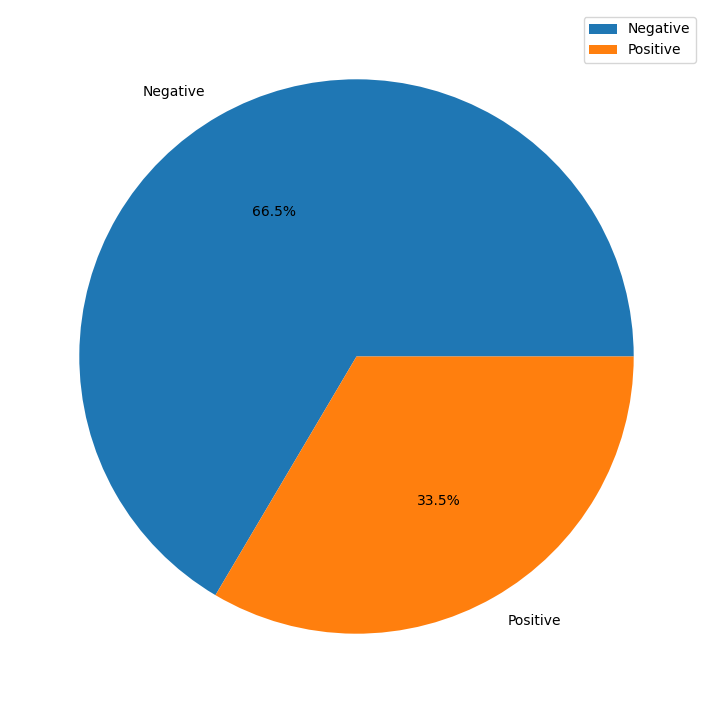

In [12]:
plt.figure(figsize=(12,9))
my_labels=df['Impact of Social Media'].value_counts().index
plt.pie(df['Impact of Social Media'].value_counts().values,labels=my_labels,autopct='%1.1f%%')
plt.legend()
plt.show()

# Time Spent on Whatsapp by Survey Respondants

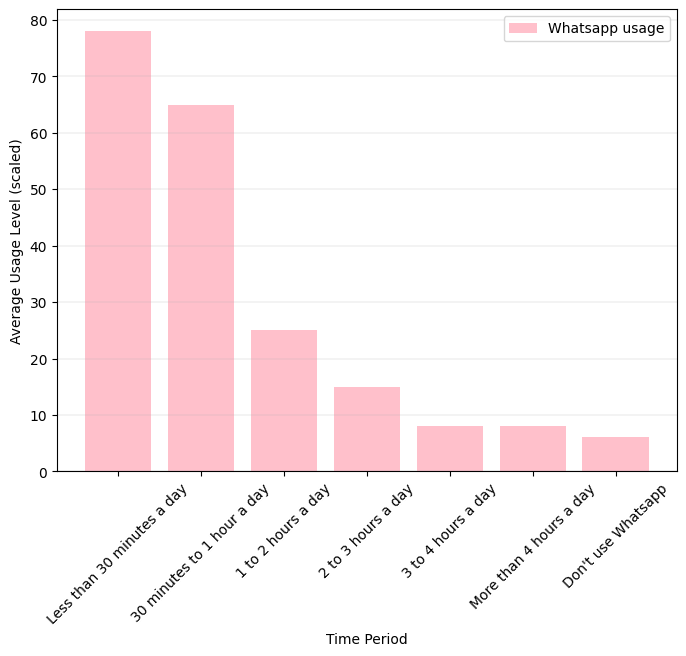

In [13]:
custom_order1 = [ 'Less than 30 minutes a day',
    '30 minutes to 1 hour a day',
    '1 to 2 hours a day',
    '2 to 3 hours a day',
    '3 to 4 hours a day',
    'More than 4 hours a day',
    "Don't use Whatsapp"]
time_spent = df['Time Spent on Whatsapp'].value_counts().reindex(custom_order1)
plt.figure(figsize=(8,6))
plt.bar(time_spent.index, time_spent.values, color='pink', label='Whatsapp usage')
plt.xlabel('Time Period')
plt.ylabel('Average Usage Level (scaled)')
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle = '-',linewidth=0.2)
plt.legend( loc=1)
plt.show()

# Time Spent on Instagram by Survey Respondants

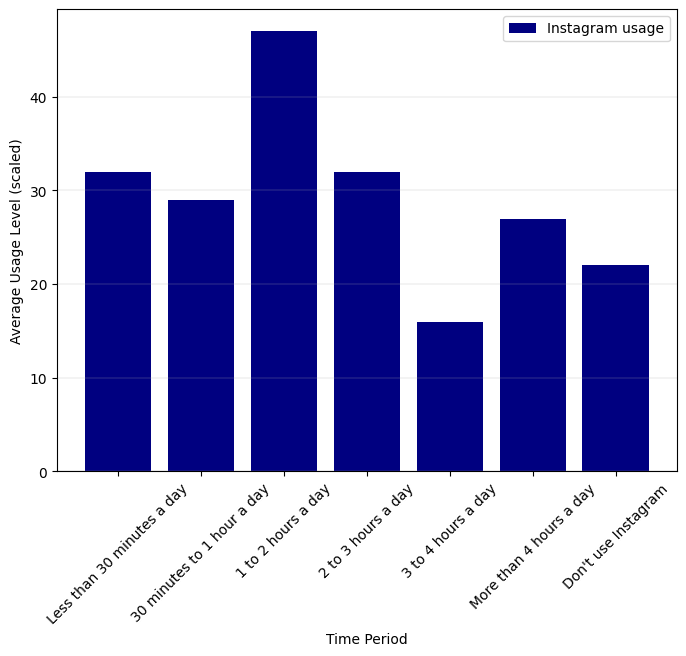

In [14]:
custom_order1 = [ 'Less than 30 minutes a day',
    '30 minutes to 1 hour a day',
    '1 to 2 hours a day',
    '2 to 3 hours a day',
    '3 to 4 hours a day',
    'More than 4 hours a day',
    "Don't use Instagram"]
time_spent = df['Time Spent on Instagram'].value_counts().reindex(custom_order1)
plt.figure(figsize=(8,6))
plt.bar(time_spent.index, time_spent.values, color='navy', label='Instagram usage')
plt.xlabel('Time Period')
plt.ylabel('Average Usage Level (scaled)')
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle = '-',linewidth=0.2)
plt.legend( loc=1)
plt.show()

# Time Spent on Snapchat by Survey Respondants

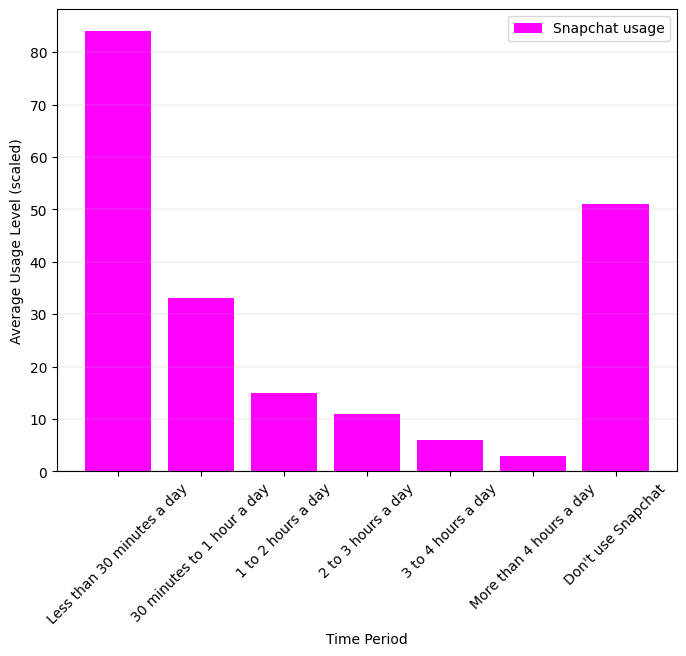

In [15]:
custom_order1 = [ 'Less than 30 minutes a day',
    '30 minutes to 1 hour a day',
    '1 to 2 hours a day',
    '2 to 3 hours a day',
    '3 to 4 hours a day',
    'More than 4 hours a day',
    "Don't use Snapchat"]
time_spent = df['Time Spent on Snapchat'].value_counts().reindex(custom_order1)
plt.figure(figsize=(8,6))
plt.bar(time_spent.index, time_spent.values, color='magenta', label='Snapchat usage')
plt.xlabel('Time Period')
plt.ylabel('Average Usage Level (scaled)')
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle = '-',linewidth=0.2)
plt.legend( loc=1)
plt.show()

# Time Spent on Facebook by Survey Respondants

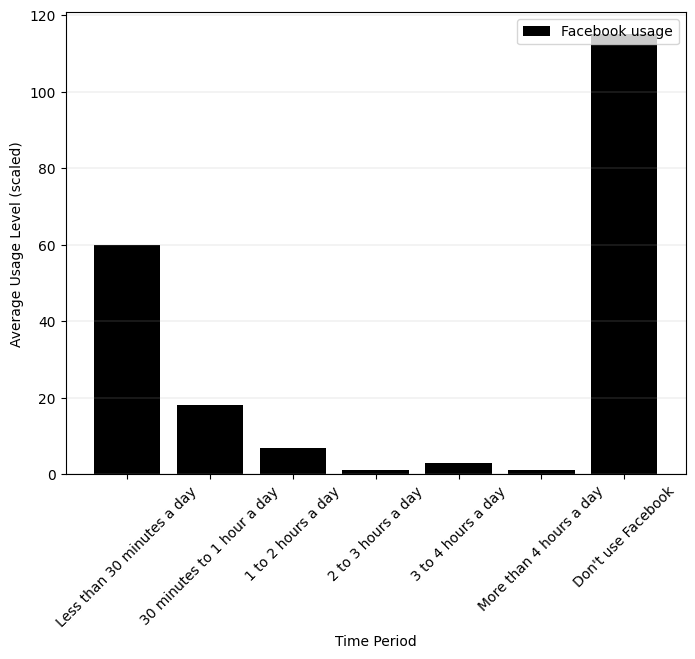

In [16]:
custom_order1 = [ 'Less than 30 minutes a day',
    '30 minutes to 1 hour a day',
    '1 to 2 hours a day',
    '2 to 3 hours a day',
    '3 to 4 hours a day',
    'More than 4 hours a day',
    "Don't use Facebook"]
time_spent = df['Time Spent on Facebook'].value_counts().reindex(custom_order1)
plt.figure(figsize=(8,6))
plt.bar(time_spent.index, time_spent.values, color='black', label='Facebook usage')
plt.xlabel('Time Period')
plt.ylabel('Average Usage Level (scaled)')
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle = '-',linewidth=0.2)
plt.legend( loc=1)
plt.show()

# Time Spent on Youtube by Survey Respondants

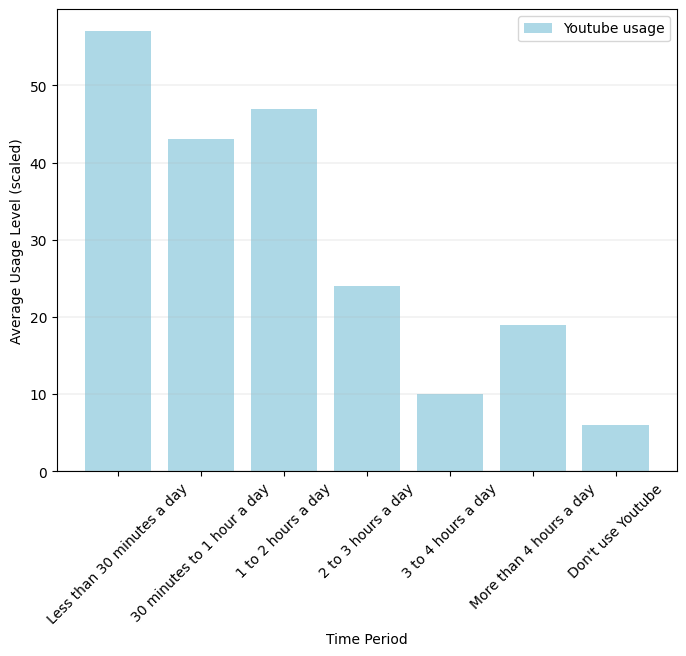

In [17]:
custom_order1 = [ 'Less than 30 minutes a day',
    '30 minutes to 1 hour a day',
    '1 to 2 hours a day',
    '2 to 3 hours a day',
    '3 to 4 hours a day',
    'More than 4 hours a day',
    "Don't use Youtube"]
time_spent = df['Time Spent on Youtube'].value_counts().reindex(custom_order1)
plt.figure(figsize=(8,6))
plt.bar(time_spent.index, time_spent.values, color='lightblue', label='Youtube usage')
plt.xlabel('Time Period')
plt.ylabel('Average Usage Level (scaled)')
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle = '-',linewidth=0.2)
plt.legend( loc=1)
plt.show()

# Sleep Hours users get when they use Social Media

In [18]:
impact_by_age = df.groupby(['Age', "Sleeping Hours (Now)"]).size().reset_index(name='Count')

fig = px.sunburst(
    impact_by_age,
    path=["Sleeping Hours (Now)",'Age'],
    values='Count',
    color="Sleeping Hours (Now)",
     width=800,
    height=650
)

fig.show()

# Sleeping Hours when users did not use Social Media

In [19]:
impact_by_age = df.groupby(['Age', "Sleeping Hours (When didn't use social media)"]).size().reset_index(name='Count')

fig = px.sunburst(
    impact_by_age,
    path=["Sleeping Hours (When didn't use social media)",'Age'],
    values='Count',
    color="Sleeping Hours (When didn't use social media)",
     width=800,
    height=650
)

fig.show()

# What does the respondant like to do when they do not use Social Media

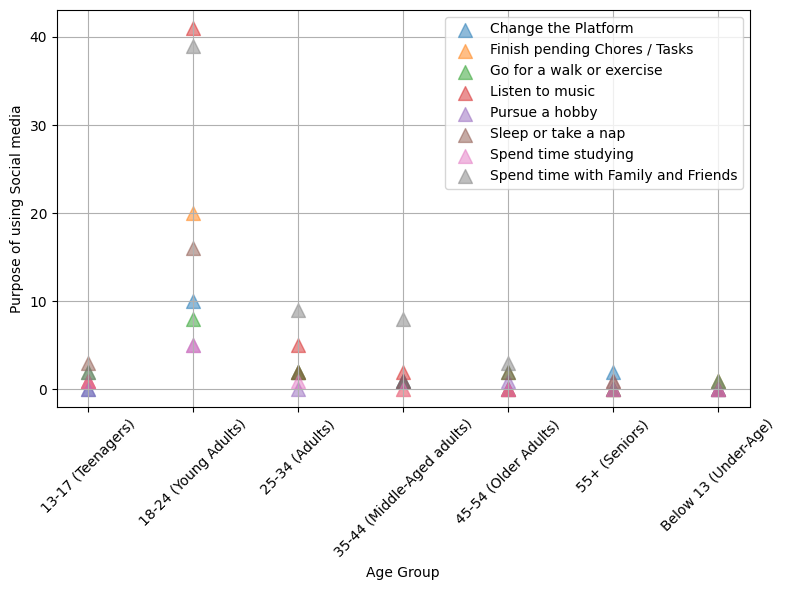

In [20]:
age_column = 'Age'
activity_column = 'Any other Leisure Activity'

activity_counts = df.groupby([age_column, activity_column]).size().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
for i in activity_counts.columns:
    plt.scatter(activity_counts.index, activity_counts[i], marker='^',alpha=0.5,s=100, label=i)
plt.xlabel('Age Group')
plt.ylabel('Purpose of using Social media')
plt.xticks(rotation=45)
plt.grid(linestyle='-')
plt.legend()
plt.tight_layout()
plt.show()

# **Cluster Analysis**
# *Each Point represents a user , Colour depicts the cluster assigned  by K-Means Clustering*

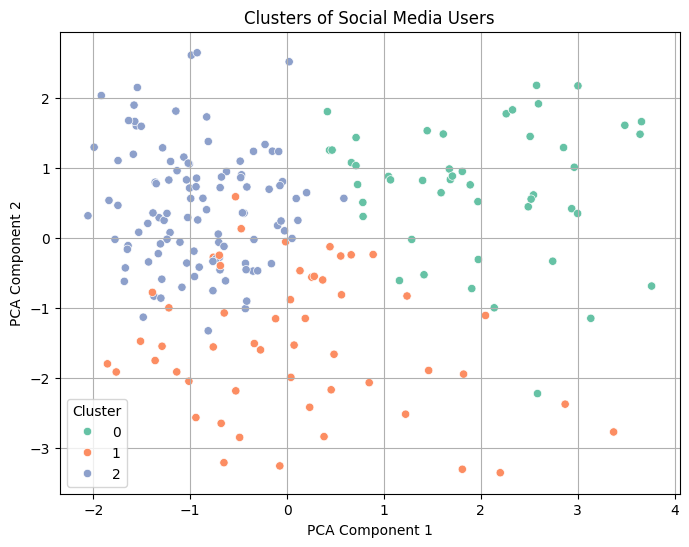

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

data = df.copy()

cols_to_use = [
    'Age', 'Gender', 'Profession', 'Most used Social Media',
    'Screen Time', 'Purpose Fulfilled', 'Quality of Sleep', 'Quality of Mood',
    'Impact of Social Media', 'Time Spent on Whatsapp', 'Time Spent on Instagram',
    'Time Spent on Snapchat', 'Time Spent on Facebook', 'Time Spent on Youtube'
]
data = data[cols_to_use].dropna()
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col].astype(str))

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
data['PCA1'] = reduced_data[:, 0]
data['PCA2'] = reduced_data[:, -1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Clusters of Social Media Users')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
